#### Flipkart Reviews Sentiment Analysis
*The dataset used here for sentiment analysis is downloaded from Kaggle. Lets start...*

##### Import libraries and Dataset

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
#print(data.head())

##### Have a Look of Data
*The dataset contains only three columns. Lets have a look at whether any of these columns contain any missing value...*

In [31]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


##### Preprocess Data
*So the dataset doesn't have any null values. Lets clean up and prepare the data before heading sentiment analysis.*

In [33]:
import nltk
import re
import string
#nltk.download('stopwords')  # Download the stopwords once.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

# Define the preprocessing module
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop_words]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return(text)
data['Review'] = data['Review'].apply(clean)
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5


##### Sentiment Analysis
*Lets have a look at how most of the people rate the products, they buy from flipkart.*

In [34]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, values=quantity, names=numbers, hole=0.5)
figure.show()

*So, 60% of the reviewers have given 5 out of 5 ratings to the products they buy from flipkart. Now, lets have a look at the kind of reviews people leave. For this I will use wordcloud to visualize the most used words in the reviews column...*

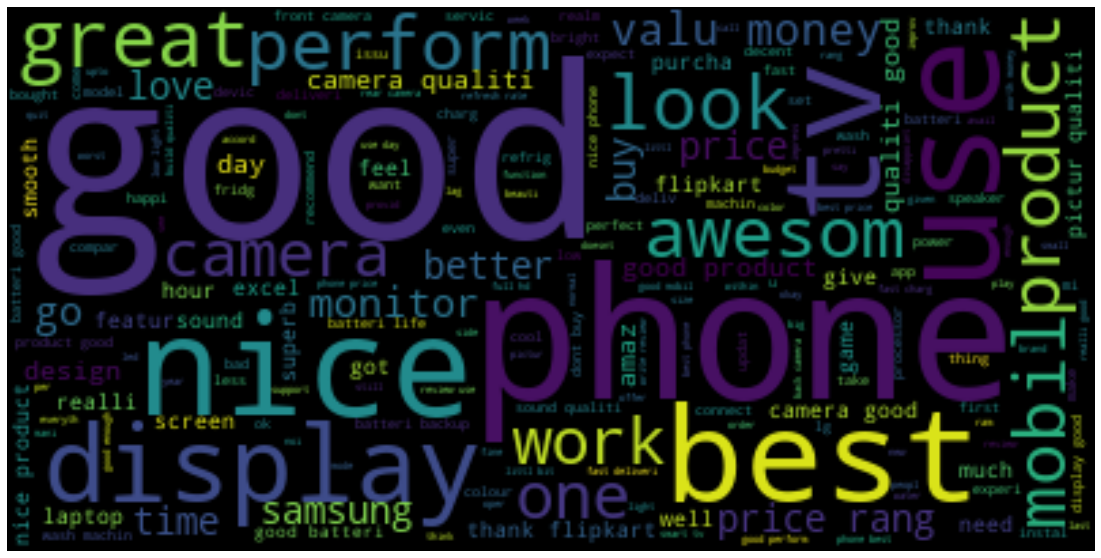

In [43]:
import wordcloud
from wordcloud import WordCloud
text = " ".join(str(i) for i in data.Review)
#print(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black').generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="silver")
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

*Now, lets analyze the sentiments of Flipkart reviews by adding three columns in the dataset as Positive, Negitive and Neutral by calculating the sentiment scores of the reviews...*

In [47]:
import nltk
#nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


*Now, Lets see how most of the reviewrs think about the products and services of Flipkart...*

In [49]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if((a>b) and (a>c)): print("Positive")
    elif((b>a) and (b>c)): print("Negative")
    else: print("Neutral")
sentiment_score(x, y, z)

Neutral


*So, most of the reviews are Neitral. Now, lets have a look at the total of Positive, Negative and Neutral sentiment scores to find a conclusion about Flipkart Reviews...*

In [50]:
print("Positive", x)
print("Negative", y)
print("Neutral", z)

Positive 923.796999999999
Negative 96.98800000000013
Neutral 1283.2200000000012


##### Conclusion
*Here, most of the reviews are Neutral and a small number of people give Negative reviews. So, we can say that people are satisfied with flipkart products and services.*